In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder="/content/drive/MyDrive/Colab Notebooks/03.專題檔案"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [ ]:
!pip install wget 
import wget

wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf") 

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=d43c51ece2d2dab93d7aa83e280bc6ea7311b333b237661420dbed9255481f8f
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


'ChineseFont.ttf'

In [ ]:
from matplotlib.font_manager import fontManager

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False 

fontManager.addfont("ChineseFont.ttf") 
plt.rcParams['font.family'] = 'ChineseFont'

#### 1. 匯入資料

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/03.專題檔案/ETL/(更新工作時數)合併data(北北桃僅壓力特徵).csv')
df

,stress_workload_amount,stress_working_hours,stress_interpersonal_colleague,stress_interpersonal_manager,stress_org_climate_grievance,turnover_intention
0,2,2,1,1,2,沒有
1,3,3,2,2,3,有
2,3,2,2,2,2,沒有
3,3,3,2,4,4,有
4,1,1,1,1,1,沒有
...,...,...,...,...,...,...
3274,3,4,2,3,3,沒有
3275,2,2,2,2,3,有
3276,1,1,3,1,1,沒有
3277,2,2,1,1,1,沒有


#### 2. 資料清理 / 特徵工程

In [7]:
df["turnover_intention"] = df["turnover_intention"].map({"有":1, "沒有":0})
df

,stress_workload_amount,stress_working_hours,stress_interpersonal_colleague,stress_interpersonal_manager,stress_org_climate_grievance,turnover_intention
0,2,2,1,1,2,0
1,3,3,2,2,3,1
2,3,2,2,2,2,0
3,3,3,2,4,4,1
4,1,1,1,1,1,0
...,...,...,...,...,...,...
3274,3,4,2,3,3,0
3275,2,2,2,2,3,1
3276,1,1,3,1,1,0
3277,2,2,1,1,1,0


#### 3. 資料集分割

In [ ]:
from sklearn.model_selection import train_test_split
X = df[["stress_workload_amount", "stress_working_hours", "stress_interpersonal_colleague", "stress_interpersonal_manager", "stress_org_climate_grievance"]]
y = df["turnover_intention"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,     
    random_state=42,   
    stratify=y        
)
print(f"訓練集大小: {len(X_train)}, 測試集大小: {len(X_test)}")
print(f"訓練集 '有' (1) 的比例: {y_train.mean():.2%}")
print(f"測試集 '有' (1) 的比例: {y_test.mean():.2%}")

訓練集大小: 2295, 測試集大小: 984
訓練集 '有' (1) 的比例: 16.51%
測試集 '有' (1) 的比例: 16.46%


#### 4. 代入模型(隨機森林)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#### 5. 模型評估

準確率 (Accuracy): 72.76%

混淆矩陣 (Confusion Matrix):
[[627 195]
 [ 73  89]]

分類報告 (Classification Report):
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       822
           1       0.31      0.55      0.40       162

    accuracy                           0.73       984
   macro avg       0.60      0.66      0.61       984
weighted avg       0.80      0.73      0.75       984


AUC-ROC 分數: 0.6700


<Figure size 600x600 with 0 Axes>

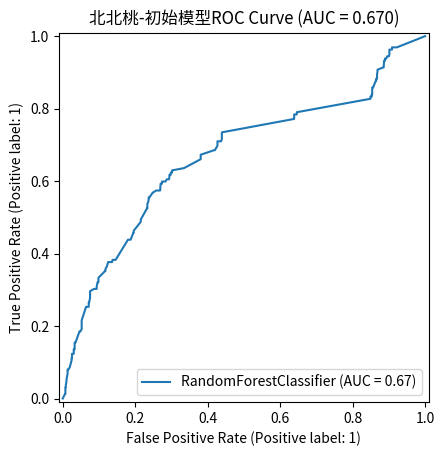

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    RocCurveDisplay 
)

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1] 
auc = roc_auc_score(y_test, y_prob) 

print(f"準確率 (Accuracy): {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\n混淆矩陣 (Confusion Matrix):")
print(confusion_matrix(y_test, y_pred))
print("\n分類報告 (Classification Report):")
print(classification_report(y_test, y_pred))
print(f"\nAUC-ROC 分數: {auc:.4f}") 

plt.figure(figsize=(6, 6))
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title(f"北北桃-初始模型ROC Curve (AUC = {auc:.3f})")
plt.show()

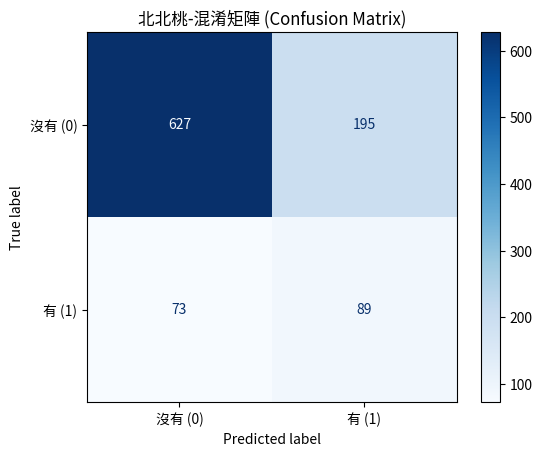

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['沒有 (0)', '有 (1)'])
disp.plot(cmap=plt.cm.Blues, values_format='d') 
plt.title('北北桃-混淆矩陣 (Confusion Matrix)') 
plt.show()

#### 6. 篩選特徵再訓練

                          Feature  Importance
4    stress_org_climate_grievance    0.278845
0          stress_workload_amount    0.245743
1            stress_working_hours    0.176077
3    stress_interpersonal_manager    0.167967
2  stress_interpersonal_colleague    0.131367


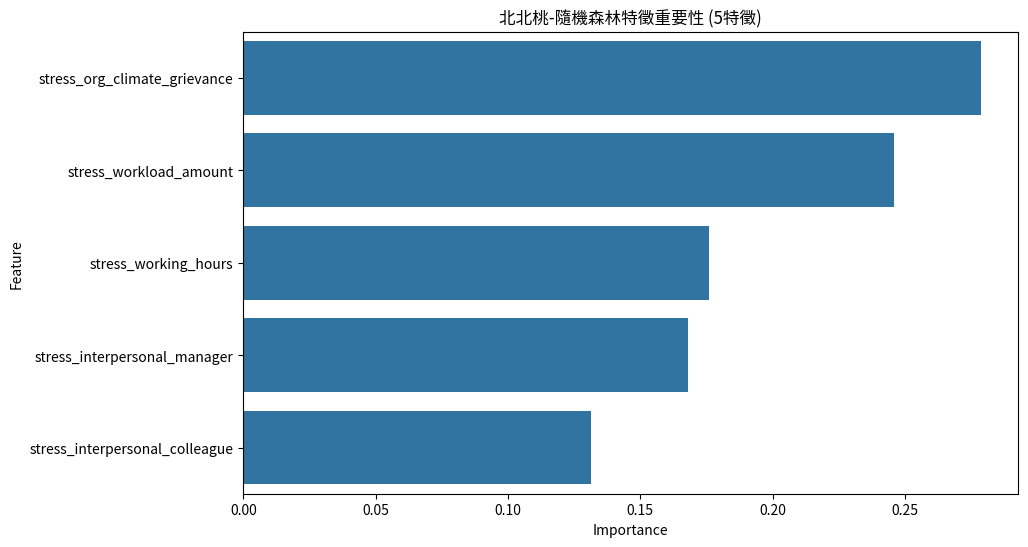


分析：根據特徵重要性，我們同樣篩選出最重要的兩個特徵。


In [ ]:
importances = rf_model.feature_importances_
features_all = X_train.columns 

feature_importance_df = pd.DataFrame({
    'Feature': features_all,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('北北桃-隨機森林特徵重要性 (5特徵)')
plt.show()

print("\n分析：根據特徵重要性，我們同樣篩選出最重要的兩個特徵。")

In [ ]:
features_simple = ['stress_workload_amount', 'stress_org_climate_grievance']

X_simple = df[features_simple]
y_simple = df['turnover_intention']

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple,
    test_size=0.3,
    random_state=42,
    stratify=y_simple
)

model_simple = RandomForestClassifier(n_estimators=100,
                                    class_weight='balanced',
                                    random_state=42
                                    )

print("\n正在訓練簡化隨機森林模型 (2特徵)...")
model_simple.fit(X_train_simple, y_train_simple)
print("訓練完成。")

y_pred_simple = model_simple.predict(X_test_simple)
y_prob_simple = model_simple.predict_proba(X_test_simple)[:, 1]
auc_simple = roc_auc_score(y_test_simple, y_prob_simple)

print("\n--- 簡化隨機森林模型 (2特徵) 評估 ---")
print(classification_report(y_test_simple, y_pred_simple))
print(f"簡化隨機森林模型 (2特徵) 的 AUC-ROC 分數: {auc_simple:.4f}")


正在訓練簡化隨機森林模型 (2特徵)...
訓練完成。

--- 簡化隨機森林模型 (2特徵) 評估 ---
              precision    recall  f1-score   support

           0       0.95      0.61      0.74       822
           1       0.29      0.83      0.43       162

    accuracy                           0.64       984
   macro avg       0.62      0.72      0.59       984
weighted avg       0.84      0.64      0.69       984

簡化隨機森林模型 (2特徵) 的 AUC-ROC 分數: 0.7853


<Figure size 600x600 with 0 Axes>

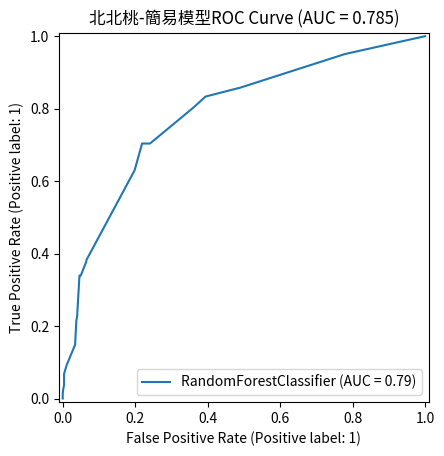

In [14]:
plt.figure(figsize=(6, 6))
RocCurveDisplay.from_estimator(model_simple, X_test_simple, y_test_simple)
plt.title(f"北北桃-簡易模型ROC Curve (AUC = {auc_simple:.3f})")
plt.show()

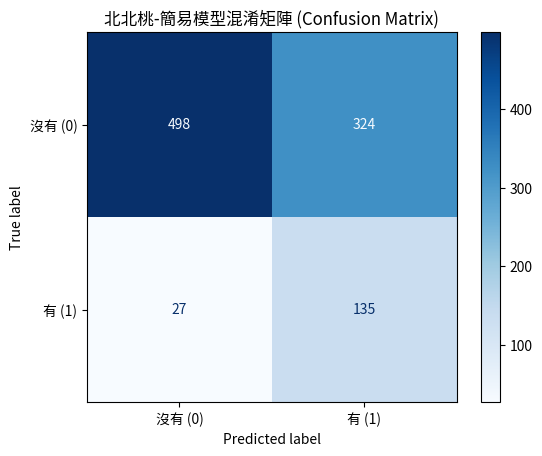

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_simple = confusion_matrix(y_test_simple, y_pred_simple)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_simple,
                              display_labels=['沒有 (0)', '有 (1)'])
disp.plot(cmap=plt.cm.Blues, values_format='d') 
plt.title('北北桃-簡易模型混淆矩陣 (Confusion Matrix)') 
plt.show()

#### 7. 將模型部署到實際應用

In [ ]:
import joblib

model_filename = 'simplified_rf_turnover_model.joblib'
joblib.dump(model_simple, model_filename)

print(f"模型已成功儲存為: {model_filename}")


features_filename = 'simplified_features.joblib'
joblib.dump(features_simple, features_filename)

print(f"簡化模型的特徵列表已成功儲存為: {features_filename}")

模型已成功儲存為: simplified_rf_turnover_model.joblib
簡化模型的特徵列表已成功儲存為: simplified_features.joblib
